# Unsupervised Algorithm

- Mall Customer Segmentation
- 1027

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
# Drop columns
X = df.drop(columns=['CustomerID', 'Gender', 'Age'], axis=1).values   # want values, not axis
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Visualize Datapoints

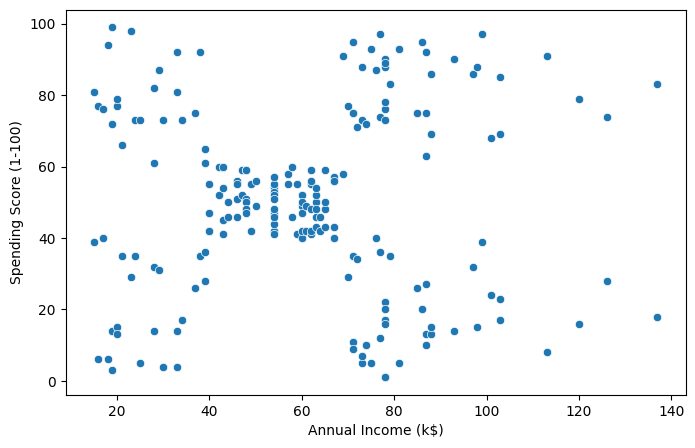

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(X, x=X[:,0], y=X[:,1])  # x & y two arg passed for income & spending  
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- Looking the graph its deficult to understand how many cluster are required, what will be the optimal of k, that why we will use elbow method

# Finding K Values by using elbow method

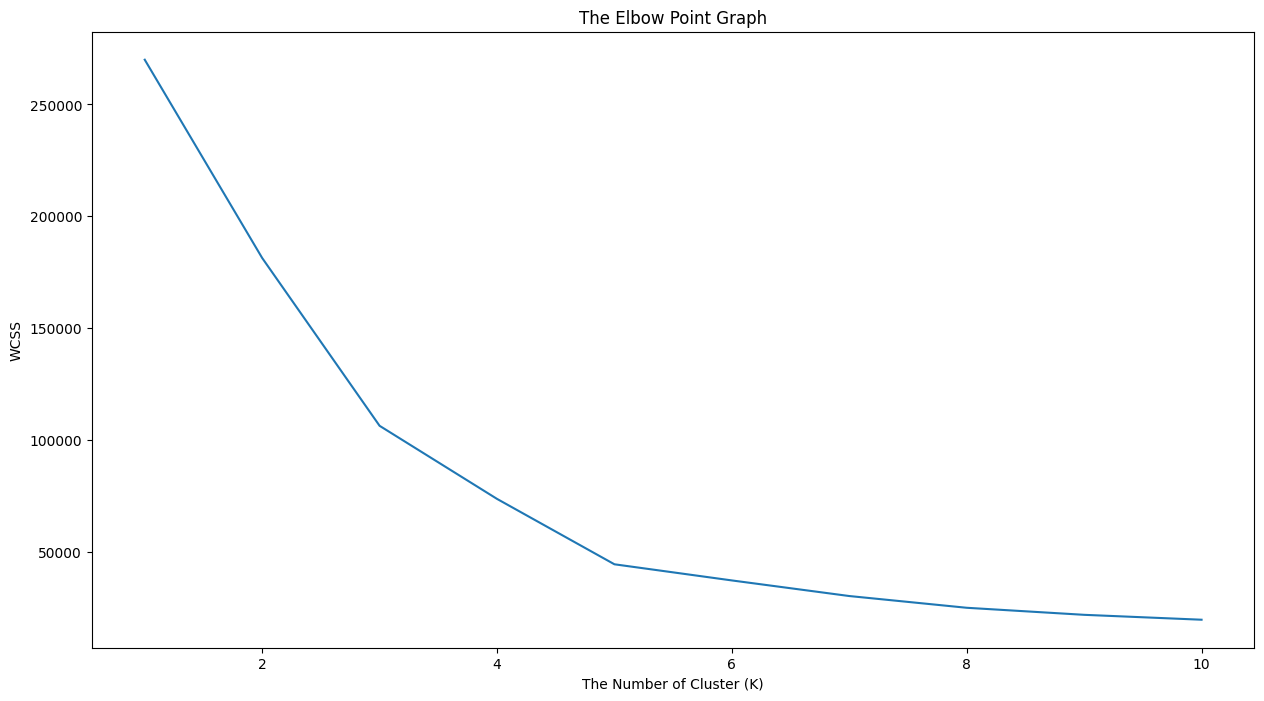

In [11]:
wcss = []                               # WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

for i in range(1,11):                   # try for max 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # init = 'k-means++': method for inialization
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('The Number of Cluster (K)')
plt.ylabel('WCSS')
plt.show()

### Elbow Graph

- As per elbow method we will focus on starp deep, where variance goes down sharply
- It is not always ideal to choose the best k value / centroid where get minimum variance, rather try to find optimal one
- the more clusters, the lesser variance, but that is not ideally recommended, as if there are 10 datapoint, with 10 clusters, no variance
- More computational energy will be consumed for having more clusters, so try to find optional one (sharp deep), as wcss dont reduce much after k=5, so we can choose 5 as the perfect k value or Cluster

- ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

# Training Kmeans Algorithm on the Training Dataset

In [29]:
# Traing the Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)   # Traing the model by X, Passing X to train the data

## Centroid Points

In [30]:
kmeans.cluster_centers_            # model.cluster_center_  , return array of center value for each & every clusters

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

## Visualize the Clusters

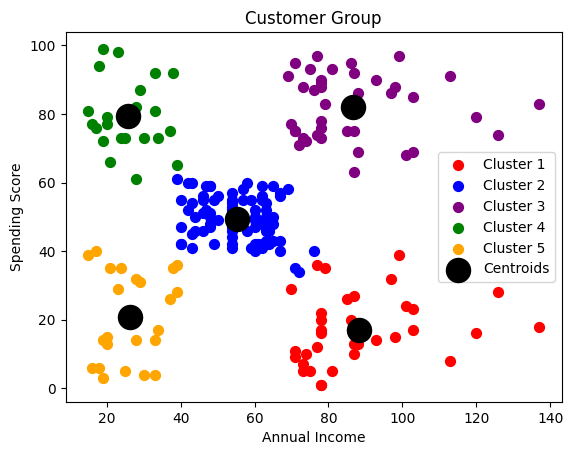

In [44]:
#    x axis:  x  r,c y axis: r,c  # c: col is fixed always
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')      # X[Y==0,0] it will go upto 4 that mean 5 cluster associate with a constant value as 0 since selected col is fixed
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label = 'Cluster 2')   # 2nd code as X[Y==1,1]: 0, 1, ...4 iterable corresponding to x axis ; col index no must be fixed as index 1, just row will change as per iteration
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='purple', label = 'Cluster 3') 
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c = 'black', label ='Centroids')   #   0: 1st col, 1: 2nd col
plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.legend()
plt.ylabel('Spending Score')
plt.show()

- There are 5th group of Customer

- X[y_kmeans == 0, 0] it's a filter that works like a slicing strategy (X[start_rows : end_rows , selected column])
- it's like you are selecting samples from your dataset X from a given row number to a specific given row number and after selecting these rows, only use column 0. This will work perfectly if our samples were contiguous unfortunately it is not since we want to select rows based on the cluster made by our model which is contained in y.
- Remember y contains the result of your clustering model where we have 5 clusters represented as cluster 0, cluster 1 ... cluster 4.


- At first y_kmeans == 0 will select the elements where y==0, meaning elements classified as cluster 0 so y==0 return a list of boolean with True for those elements belonging to cluster 0 and false for other elements. The outcome will now be X[[True, False, etc...],0], the first element in the bracket represents the list of boolean mentioned above and the second element ( the 0 ) represents the column (or feature. Example sepal length for the Iris dataset). Also, remember to make a scatter plot we need two values (x and y) in the case of the iris dataset, X can be the Sepal length and Y the Sepal Width.
- So the first line X[y_kmeans == 0,0],X[y_kmeans == 0,1] will be evaluated to X[[True, False...],0] and X[[True, False],1] the bolded value here represents the column's value in your original dataset. Each Boolean value is mapped to the corresponding row in your dataset, if the value is True, that row is selected and its columns value (corresponding to the bolded part of the bracket) is selected. So you will have something like this:

#### Reference

- https://stackoverflow.com/questions/67094346/what-does-these-lines-of-codes-in-k-means-clustering-means
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://www.youtube.com/watch?v=n9YDcH-LHa4
- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- https://www.geeksforgeeks.org/ml-k-means-algorithm/
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- https://www.tutorialspoint.com/machine_learning_with_python/clustering_algorithms_k_means_algorithm.htm
